In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("..\\vacancies.csv")
df

,date,vacancy,salary,place,description,company,required_technologies
0,2024-09-10,Senior Python Engineer (Django),$3000–4000,віддалено,(formerly RetargetApp) is a marketing solution...,Adwisely,"django,http,docker,kubernetes,ansible,aws,post..."
1,2024-09-10,Senior Backend Engineer (Python),NaN,"за кордоном, віддалено",",,Crafting an elegant, resilient, and useful d...",BCD TripTech,"django,http,docker,ansible,aws,terraform,postg..."
2,2024-09-10,Senior Python Automation QA Engineer,NaN,"Львів, віддалено","We at,are seeking a highly skilled,to join our...",devspiration,"ci/cd,pytest,selenium,git"
3,2024-09-10,Senior Python Developer,NaN,віддалено,",,The Senior Python Developer writes and enhan...",Starkflow,"django,flask,fastapi,rest,numpy,pandas,aws,pos..."
4,2024-09-10,Middle Python Database Developer,NaN,"Київ, віддалено","Українська IT-компанія Nova Digital, що входит...",Nova Digital,"numpy,pandas,ci/cd,postgresql,git"
...,...,...,...,...,...,...,...
148,2024-09-09,Middle/Senior Python Developer,NaN,віддалено,The CHI Software team is not standing still. W...,CHI Software,"django,flask,http,rest,ci/cd,aws,gcp,postgresq..."
149,2024-09-09,Middle Python Engineer (ML project),NaN,"Київ, віддалено",— це найбільша у світі спільнота любителів рос...,PlantIn,"fastapi,numpy,pandas,pytorch,docker,kubernetes..."
150,2024-08-28,Senior software engineer (scraping),NaN,віддалено,"In,, we are building a place where optimal pri...",Competera,"fastapi,ml,kubernetes,aws,gcp,postgresql,redis..."
151,2024-08-19,"Lead Full Stack Python(Flask)/React (80% BE, 2...",NaN,віддалено,",A Software as a Service (SAAS) platform is be...",nearshorefriends,"flask,rest,git"


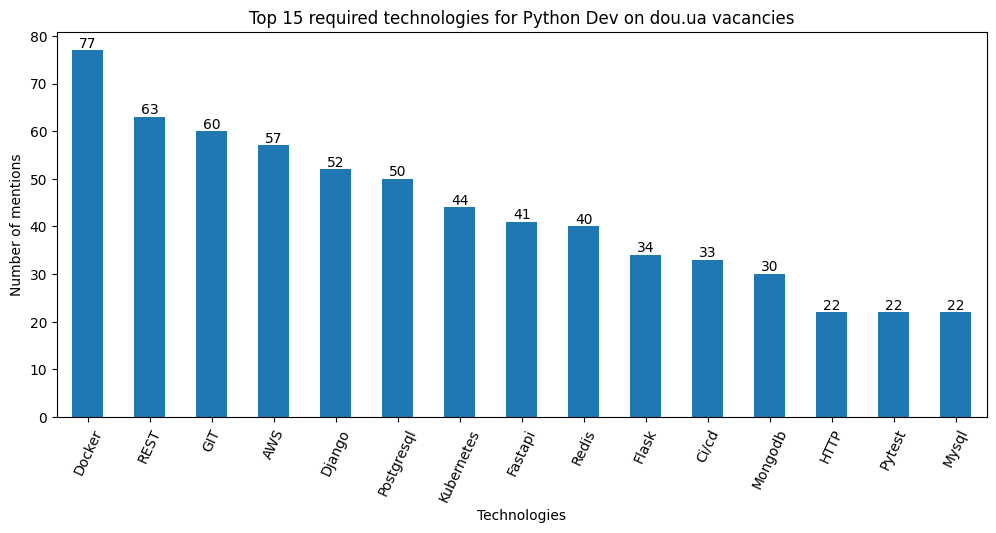

In [3]:
technologies = df["required_technologies"].str.split(",")
top_technologies = pd.Series(
    [
        tech.capitalize() if len(tech) > 4 else tech.upper()
        for sublist in technologies.dropna()
        for tech in sublist
    ]
).value_counts().head(15)



plt.figure(figsize=(12, 5))
plt.title("Top 15 required technologies for Python Dev on dou.ua vacancies")

plt.xlabel("Technologies")

plt.ylabel("Number of mentions")


bars = top_technologies.plot.bar(rot=65)
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height()}",
        ha="center",
        va="bottom"
    )


plt.show()

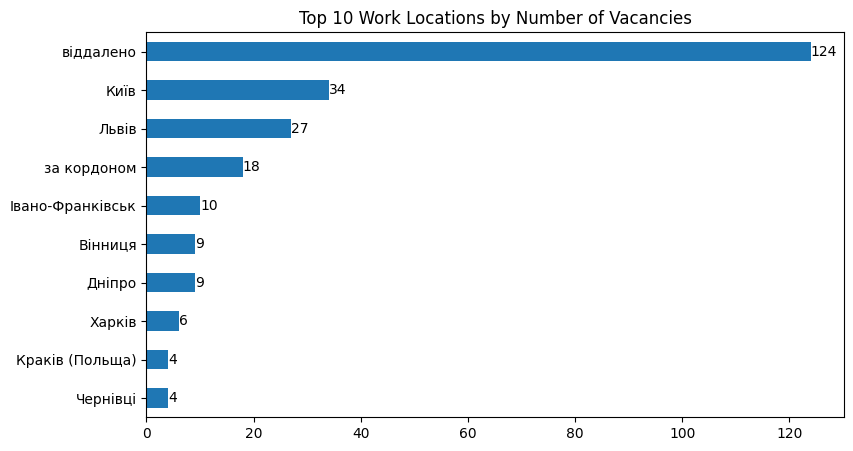

In [4]:
places = df["place"].str.split(",")
top_places = pd.Series(
    [
        place.strip()
        for sublist in places.dropna()
        for place in sublist
    ]
).value_counts().head(10)


plt.figure(figsize=(9, 5))
plt.title("Top 10 Work Locations by Number of Vacancies")

top_places = top_places.sort_values(ascending=True)

bars = top_places.plot.barh()

for bar in bars.patches:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f"{int(bar.get_width())}",
        va="center"
    )

plt.ylabel("")

plt.show()


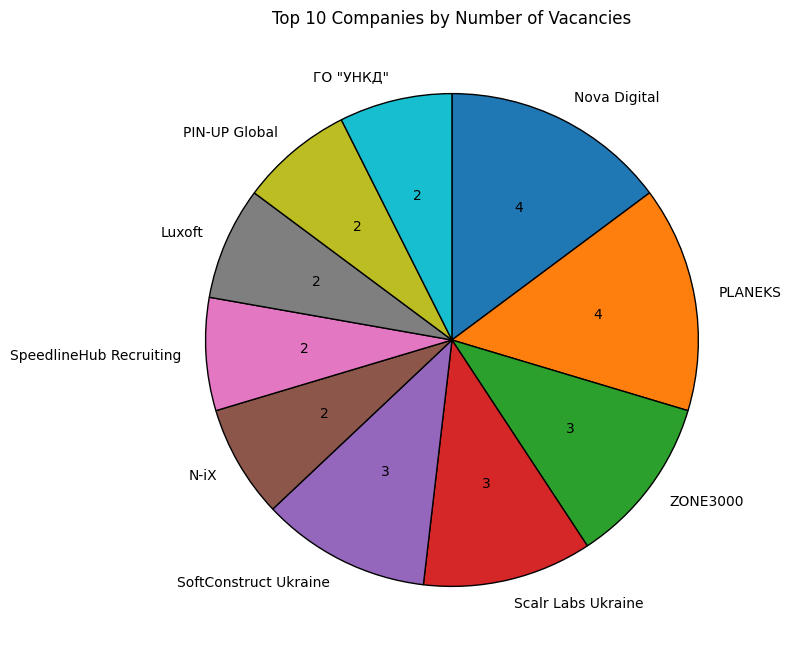

In [5]:
top_companies = df["company"].value_counts().head(10)

# Set up the figure and title
plt.figure(figsize=(8, 8))
plt.title("Top 10 Companies by Number of Vacancies")

# Create the pie chart with formatted labels showing actual counts instead of percentages
top_companies.plot.pie(
    autopct=lambda p: "{:.0f}".format(p * sum(top_companies) / 100),  # Convert percentages to absolute counts
    startangle=90,  # Optional: start the first slice at 90 degrees
    counterclock=False,  # Optional: display the pie in a clockwise direction
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'},  # Optional: add border around slices
)

# Remove the y-axis label
plt.ylabel("")

# Show the plot
plt.show()


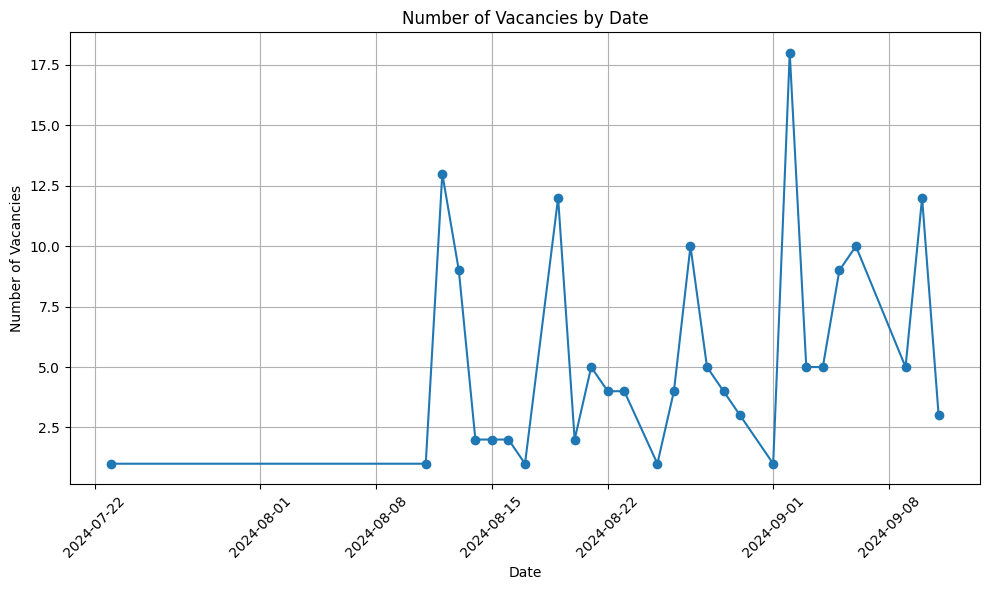

In [6]:
df['date'] = pd.to_datetime(df['date'])

# Group by date and count the number of vacancies
vacancies_by_date = df.groupby('date')['vacancy'].count()

# Plotting vacancies by date
plt.figure(figsize=(10, 6))
plt.plot(vacancies_by_date.index, vacancies_by_date.values, marker='o')
plt.title("Number of Vacancies by Date")
plt.xlabel("Date")
plt.ylabel("Number of Vacancies")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

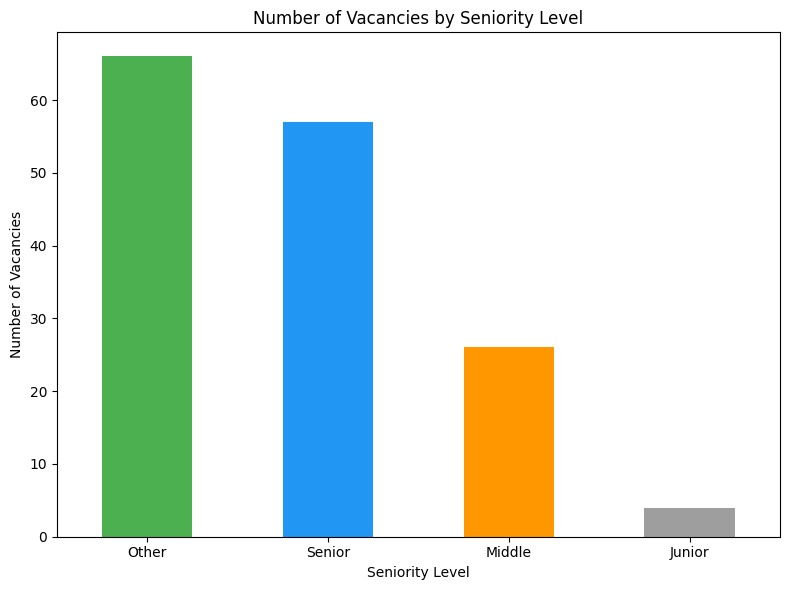

In [7]:
df['seniority'] = df['vacancy'].apply(
    lambda x: 'Junior' if 'Junior' in x else ('Middle' if 'Middle' in x else ('Senior' if 'Senior' in x else 'Other'))
)

# Group by seniority level and count the vacancies
vacancies_by_seniority = df['seniority'].value_counts()

# Plotting vacancies by seniority level
plt.figure(figsize=(8, 6))
vacancies_by_seniority.plot(kind='bar', color=['#4CAF50', '#2196F3', '#FF9800', '#9E9E9E'])
plt.title("Number of Vacancies by Seniority Level")
plt.xlabel("Seniority Level")
plt.ylabel("Number of Vacancies")
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()